## MTH 9879 Market Microstructure Models,    Spring 2017

<p>

### Lecture 2: Order book and order flow: The market or limit order decision

Jim Gatheral   
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "right" width=500></h3>


$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$



## Outline of Lecture 2

-   Biais, Hillion, and Spatt (1995)

-   Order flow from order book: The market order or limit order decision

    -   The Parlour (1998) model

    -   The Foucault Kadan Kandel (2005) model

    -   The Roşu (2009) model

    -   Cont and Kukanov (2013)

-   Order book from order flow

    -   Bouchaud, Mézard and Potters order book shape approximation

    -   Mike and Farmer empirical law of order arrivals

### Price signal in the ZI simulation

-   Recall from Lecture 1 that even in the ZI model, the shape of the
    order book allows prediction of price movements.

    -   Traders really would need to have zero intelligence not to
        condition on book shape!
        
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/asymmetryImbalance.png" align = "center" width=600></h2>

Figure 1: With one share at best offer, future price change vs book
imbalance.

### Biais, Hillion and Spatt

-   In the zero-intelligence models, limit order, market order and
    cancelation processes are all independent.

    -   In particular, these processes do not depend on the state of the
        order book.

-   [Biais, Hillion, and Spatt]<sup id="cite_ref-BHS" class="reference"><a href="#cite_note-BHS"><span>[</span>1<span>]</span></a></sup> performed an empirical analysis of the interaction between the
    order book and order flow processes on the Paris Bourse.

### Biais, Hillion and Spatt results


<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BHS.png" align = "center" width=900></h2>


### Biais, Hillion and Spatt: Observations

-   <span>We note the <span>*diagonal*</span> effect:</span>

    -   <span>Events with the same sign (note: buy or sell) are more frequent than events
        with different signs.</span>

    -   The probability that a given type of order or trade occurs is
        larger after this event has just occurred than it would be
        unconditionally.

-   This is inconsistent with the zero-intelligence (ZI) picture.

    -   In the ZI picture, the relative probabilities of events are
        independent of previous events.

    -   In real markets, order flow depends on the shape of the order
        book.

-   In a ZI market, traders submit orders and cancelations without
    looking either at the current state of the book or analyzing order
    flow.


<font color="red">
-   In real markets, traders look at the screen before trading!

### Time series of trade signs: MSFT vs ZI

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

In [2]:
library(repr)
options(repr.plot.height=5)

In [3]:
# Simulate and generate time series of returns
alpha <-1; mu<-10; delta <- 0.2; # Asymptotic book depth is 5
numEvents <- 10000
initializeBook5()
for(count in 1:numEvents){generateEvent()}

tradeLog <- eventLog[(eventLog$Type=="MB")|(eventLog$Type=="MS"),]
tradeSigns <- ifelse(tradeLog$Type=="MB",+1,-1)
someTrades <- 1:100

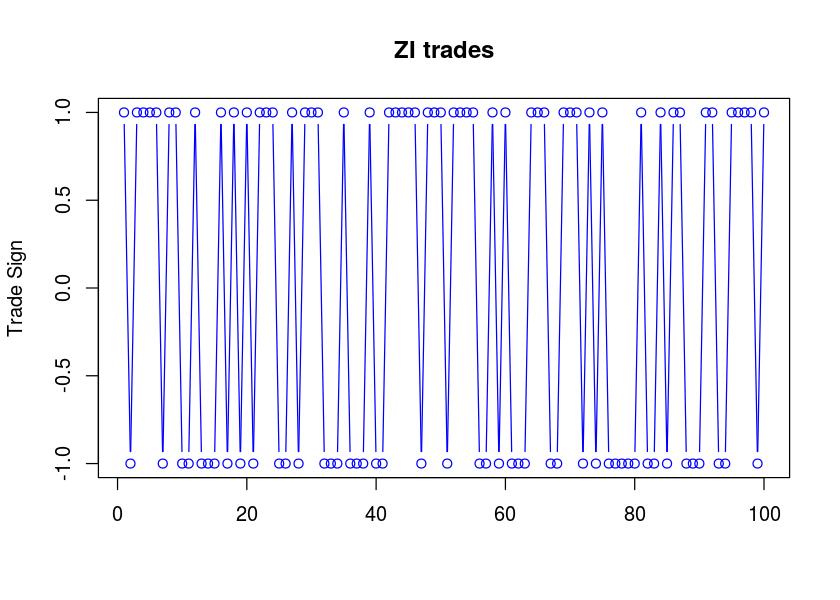

In [4]:
plot(tradeSigns[someTrades],type="b",col="blue",xlab=NA, ylab="Trade Sign",main="ZI trades")

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/msftTrades.png" align = "center" width=600></h2>

Figure 2: Sequences of trade signs from real data and from ZI
simulated data

### Observations

-   <span>We don’t see any particular pattern in the ZI market.</span>

-   <span>In the real MSFT market though, we see that MB tends to follow
    MB and MS tends to follow MS.</span>

    -   It seems that real traders condition their trades on something.
<font color="red">
    -   In real markets, traders look at the screen before trading!

### The limit or market order decision

-   <span>We start by describing one of the cleverest models of
    strategic trading due to Christine Parlour.</span>

    -   Traders correctly compute the probabilities of future events conditional on the current state of the order book and their own actions.

    -   Traders send a market order or a limit order, whichever is better.

    -   Philosophically the <span>*polar opposite*</span> of the zero-intelligence assumption.

### The Parlour (1998) model

-   <span>Trading occurs on day 1, starting at time $t=0$ and ending at
    $t=T$.</span>

-   <span>Everyone knows that on day 2, the asset will be worth
    $V$.</span>

-   <span>Infinite order-book depth at the bid $B$ and the ask $A$ so
    these don’t change over time.</span>

    -   <span>$
        B=V-s/2;\,A=V+s/2;
        $</span>

-   <span>At each time $t$ during the trading day, one (new and
    different) trader arrives who is a buyer or seller with probability
    $1/2$.</span>

    -   <span>This trader may submit a market or a limit order or do
        nothing.</span>

-   <span>The trader at time $t$ has utility
    $$U_t=C_1+\beta_t\,C_2\, \text{ with } \beta_t \in \left[\underline \beta, \bar \beta\right]$$
    where $\beta_t$ is a time-preference parameter and the $C_i$ denote
    consumption on day $i=1,2$. </span>

    -   For example, if trader $t$ is a seller, the lower $\beta_t$ is,
        the more likely
        he is to submit a market order.

### A generic timestep in the Parlour model

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ParlourGenericTimeStep.png" align = "center" width=600></h2>


### At time $T$

-   <span>There is no point in sending a limit order because the
    probability of a fill is zero.</span>


-   <span>For a seller, the increase in utility (benefit) associated
    with a market sell would be
    
    $$\Delta U_T=B-\beta_T\,V.$$
    
    Thus a
    seller will enter a market order only if $B-\beta_T\,V >0$ or
    equivalently if $\beta_T< B/V$. </span>

-   <span>We can then compute the unconditional probability as of time
    $T-1$ of a market sell (MS) in period $T$:
    
    $${\mathbb{P} }^S_T=\frac{1}{2}\,{\mathbb{P} }\left(\beta_T<\frac{B}{V}\right).$$
    </span>


-   <span>Similarly,
    $${\mathbb{P} }^B_T=\frac{1}{2}\,{\mathbb{P} }\left(\beta_T>\frac{A}{V}\right).$$
    </span>

### At time $T-1$

-   <span>There is now some potential benefit to submitting a limit
    order.</span>

-   <span>The upside associated with a limit order depends on the
    probability of a fill (respectively MB or MS) in period $T$.</span>

    -   <span>These fill probabilities depend in particular on the
        distribution of $\beta_T$.</span>

-   <span>There is no point in sending a limit order if there is
    existing quantity in the order book.</span>

    -   <span>The limit order at the front of the queue has
        priority.</span>

### At generic time $t$

-   <span>The upside associated with a limit order depends on the
    probability of a fill (respectively MB or MS) in subsequent
    periods.</span>

    -   <span>These fill probabilities depend in particular on the
        distribution of $\beta_t$.</span>

-   <span>The decision to send a limit order depends on position in the
    queue.</span>

    -   <span>So the market order/ limit order decision depends on the
        number of shares $n_t$ on the same side of the book.</span>

-   <span>For clarity, again consider the case of a seller.</span>

-   <span>The market order/ limit order decision depends also on the
    length of the queue on the bid side of the order book.</span>

    -   <span>The longer the queue on the bid side, the more likely it
        is that a market buy order will be submitted in subsequent
        periods and the more likely that a limit sell order will be
        filled.</span>

### Time $t$ payoffs

<a name="tab:payoffs"></a>Table 1: Time $t$ payoffs


|      Strategy     | Payoff               |
|:-----------------|:------|
|  Market sell (MS)   |   $B-\beta_t\,V$   |
|  Limit sell (LS)    |   $(A-\beta_t\,V)\,{\mathbb{P} }^B_{t+i}$   |
|   Limit buy (LB)    |   $(\beta_t\,V-B)\,{\mathbb{P} }^S_{t+i}$   |
| Market buy (MB)   |   $\beta_t\,V-A$   |
  

-   <span>From the payoffs in [Table 1](#tab:payoffs), we can compute the
    probabilities of a market buy and market sell and by recursion,
    compute the same for period $t-1$.</span>

### A numerical example

Following [Parlour]<sup id="cite_ref-Parlour" class="reference"><a href="#cite_note-Parlour"><span>[</span>7<span>]</span></a></sup>, we assume the following parameters:

$$
V=5.5;\,B=5;\,A=6; \,T=3 \text { and } \beta_t \sim U(0,2).
$$ 

At time
$t=T= 3$,

$$
\mathbb{P} (MS|S) =\frac{1}{2}\,\int_0^2\,d\beta \mathbb{1} _ {\beta < B/V} =\frac{1}{2}\,\int_0^{10/11}\,d\beta = \frac{5}{11}.
$$

Thus 

$$\PP^S_3=\frac{5}{22}.$$ 

By symmetry, 

$$\PP^B_3=\frac{5}{22}.$$

### Time $t=2$: No existing quantity in the order book

Suppose the order book is empty at time $t=2=T-1$.

-   The utility of a market sell order is $B - \beta_t\,V$.

-   The utility of a limit sell order is
    $(A - \beta_t\,V) \,{\mathbb{P} }^B_3$.

Thus, submit a MS only if
$B - \beta_t\,V \geq (A - \beta_t\,V) \,{\mathbb{P} }^B_3$ or
equivalently

$$\beta_2 \leq \frac{B-A\,{\mathbb{P} }^B_3}{V\,(1-{\mathbb{P} }^B_3)} = \frac{B-A\,{\mathbb{P} }^B_3}{V\,(1-{\mathbb{P} }^B_3)} =\frac{160}{187}.$$

Continuing in this way, we compute that a seller will choose as follows:


| Action         | Condition | Numerically |
|----------------|-----------|-------------|
| Market sell (MS) |     if $B-\beta_t\,V \geq (A-\beta_t\,V)^+\,{\mathbb{P} }^B_{3}$      |    $0 \leq \beta_t<\frac{160}{187}$         |
| Limit sell (LS)  |     if $(A-\beta_t\,V)\,{\mathbb{P} }^B_{3}>(B-\beta_t\,V)^+$      |   $\frac{160}{187} \leq \beta_t<\frac{12}{11}$          |
| Do nothing     |     otherwise      |   $\frac{12}{11}\leq \beta_t \leq 2$          |

### Time $t=2$: No existing quantity in the order book

Thus, conditional on an empty book and the trader being a seller,

$$
\begin{eqnarray*}
{\mathbb{P} }_{MS}&=&{\mathbb{P} }\left(\beta_2<\frac{160}{187}\right)=\frac{80}{187}\\
{\mathbb{P} }_{0}&=&{\mathbb{P} }\left(\beta_2>\frac{12}{11}\right)=\frac{5}{11}\\
{\mathbb{P} }_{LS}&=&1-{\mathbb{P} }_{MS}-{\mathbb{P} }_{0}=1-\frac{80}{187}-\frac{5}{11}=\frac{2}{17}.\end{eqnarray*}
$$

### What if the book is not empty?

-   If there is quantity on the bid side, it is not optimal for a buyer
    to leave a limit order.

    -   This case reduces to the case $t=3=T$.

    -   MS is optimal for a seller if $ \beta< B/V =10/11 $ so
        ${\mathbb{P} }_{MS}=5/11$.

-   In particular, consider the case where ${160}/{187}\leq \beta<10/11$
    ($0.86\leq \beta<0.91$):

    -   If there is no sell order in the book, a seller will submit LS.

    -   If there is an existing sell order in the book, a seller will
        submit MS.

-   We need to expand our state space to include the state of the book.

    -   The market/limit order decision depends on the state of the
        order book.

    -   We need richer notation. For example
        ${\mathbb{P} }_{\text{event}}[n_B,n_A](t)$.

### Model predictions

-   <span>An increase in book depth $n_B$ on the bid-side decreases the
    probability of a limit buy order.</span>

-   <span>A decrease in book depth $n_A$ on the ask-side decreases the
    probability of a market sell order in subsequent periods and so
    decreases the probability of a limit buy order.</span>

-   <span>Order signs will be autocorrelated - a <span>*herding*</span>
    effect.</span>

    -   <span>A market sell order increases the probability of a
        subsequent market sell and decreases the probability of a
        subsequent market buy.</span>

### Comments

-   In the Parlour model, it is optimal to herd even though the bid and
    ask prices do not move.

    -   Conditional on MB, the probability of MB increases if agents are
        rational.

-   Even in the ZI market, we can predict the expected price change from
    the current shape of the order book.

    -   We are far from efficient markets at this micro timescale.

    -   It is optimal to herd not only for the strategic reasons
        illuminated by the Parlour model but also because order book
        shape and order flow are informative for future price movements.

-   <span>It follows in particular that both market and limit orders
    have market impact.</span>

    -   <span>In fact, even hidden orders will have market impact due to
        pinging!</span>

### Zero intelligence vs efficient markets

-   <span>Traders certainly do condition their actions on the current
    state of the market as well as the history of order flow.</span>

-   <span>However, we cannot believe the caricature that rational
    traders are able to compute the rational reaction of other agents to
    their own rational actions.</span>

    -   We will see later when we study the Kyle model that this
        caricature may nevertheless describe an equilibrium resulting
        from agents performing linear regression.

-   <span>Reality lies somewhere between these two extremes.</span>

### Foucault, Kadan and Kandel (2005)

In this model:

-   Liquidity traders choose between market orders and limit orders.

    -   This choice depends on their degree of impatience.

-   Different traders value immediacy differently.

    -   Type ${\mathcal{P} }$ traders incur a waiting cost at rate
        $\delta_P$ and type ${\mathcal{I} }$ traders at rate $\delta_I$
        with $\delta_I>\delta_P>0$.

    -   Traders arrive at rate $\lambda$.

    -   The proportion of patient traders is $\theta_P$.
        $\theta_I=1-\theta_P$.

-   Order book depth is infinite at $B$ and $A$, where $A>B$. The best quotes $b$ and $a$ satisfy $b\geq B$ and $a \leq A$, so $s:=a-b < K := A-B$. Prices are in discrete ticks $\Delta$.

### Trading rules

1.   A trader arrives only once, submits an order and leaves the market.
<font color="red">Orders cannot be modified or canceled.</font>

2.  Limit orders must be price improving; they must narrow the spread.
<font color="red">Unrealistic assumption.</font>

3.  Buyers and sellers alternate. The first trade is a buy with
    probability $\frac12$.

### Computation of equilibrium

Wlog, take tick size $\Delta=1$.

-   A buyer can either take the offer at $a$ or submit a limit buy order
    at $a-j$ with $j \in \{1,...,s\}$.

    -   Higher $j$’s are less aggressive.

-   The trader needs to compute
    $$\max_{j \in \{0,...,s-1\}} \pi_i(j):= j-\delta_i \,T(j)$$ where
    $T(j)$ is the expected time to execution and $i \in \{I,P\}$.

-   Equilibrium strategies assign a $j$ to each possible spread $s$.

-   Equilibrium strategies (different for ${\mathcal{P} }$ and
    ${\mathcal{I} }$) maximize expected profits assuming that all
    subsequent traders follow the same optimal strategy.

### Equilibrium solution

-   Start at the end node: If $s=1$, the trader, whether
    ${\mathcal{P} }$ or ${\mathcal{I} }$, needs to submit a market
    order (because limit orders must improve the price).

-   If $s=2$ compare submission of a limit order with $j=1$ or a market
    order.

    -   If a limit order is submitted, it will shrink the spread to $1$
        and will be executed next period. So $T(1)=\frac1\lambda$.

    -   The payoff from a market order is $0-\delta_i \,T(0)=0$.

    -   The payoff from a limit order is $1-\frac{\delta_i}\lambda$ which is
        greater for $\mathcal{P}$ than for $\mathcal{I}$.

-   Continuing by induction, we can compute optimal actions for both
    ${\mathcal{P} }$ and ${\mathcal{I} }$ traders for all possible
    spreads $s \leq K=A-B$.

    -   In particular, there is some minimum spread level $s^*$ such
        that both ${\mathcal{P} }$ and ${\mathcal{I} }$ traders will in
        general submit only market orders if $s \leq s^*$.

    -   Also, there is a maximum spread level beyond which both
        ${\mathcal{I} }$ and ${\mathcal{P} }$ traders will submit limit
        orders.

### Final result

-   The final expression for the expected time to execution is

    <a name="eq:timeFKK"></a>(1)
    $$T(s_m)=\frac{1}{\lambda}\,\left\{1+2\,\sum_{k=1}^{m-1}\,\left(\frac{\theta_P}{1-\theta_P}\right)^k\right\}
    $$ where $s_m$ is the $m$th spread value in the
    table of equilibrium spreads derived above.

-   The equilibrium spreads are equal to:

    <a name="eq:spreadFKK"></a>(2)
    $$s_q = K = A-B; \,s_m=K - \sum_{k=m+1}^q\,\psi_k \text{ for } m=2,...,q-1; \,s_1=s^*
    $$ 
    
    where the spread improvement function $\psi_k = s_k - s_{k-1}$ is given by
    
    $$\psi_k=\left \lceil 2\,\frac{\delta_P}{\lambda\,\Delta}\,\left(\frac{\theta_P}{1-\theta_P}\right)^{k-1}\right \rceil .$$

### Comparative statics

From [(1)](#eq:timeFKK) and [(2)](#eq:spreadFKK), we see that:

-   As the proportion $\theta_P$ of patient traders increases:

    -   The expected time to execution increases.

    -   Spread improvement increases and so the equilibrium spreads decrease.

-   As the arrival rate $\lambda$ increases, spreads increase.

-   As the cost of waiting decreases, spreads decrease.

    -   Scaling $\lambda$ and the $\delta_i$ by the same factor leaves
        all results unchanged.

-   Note that we can define a measure of resiliency $R = \theta_P^{q-1}$
    which is the probability that the spread will revert from its
    maximum level $K=A-B$ to $s^*$ before the next transaction.

### FKK (2005) model summary

-   The Foucault, Kadan and Kandell model gives us an equilibrium
    distribution of spreads.

-   The optimal strategy for both ${\mathcal{I} }$ and ${\mathcal{P} }$
    traders depends (only) on the spread.


-   If the spread is very wide, both ${\mathcal{I} }$ and
    ${\mathcal{P} }$ will submit limit orders.

-   If the spread is sufficiently narrow, both ${\mathcal{I} }$ and
    ${\mathcal{P} }$ will submit market orders.

### The Roşu (2009) model

In the [Roşu]<sup id="cite_ref-Rosu" class="reference"><a href="#cite_note-Rosu"><span>[</span>8<span>]</span></a></sup> model:

-   Four types of traders: Patient buyers, patient sellers, impatient
    buyers, impatient sellers arrive randomly at rates
    $\lambda_{PB},\,\lambda_{PS},\,\lambda_{IB},\,\lambda_{IS}$.

-   As in Foucault, Kadan and Kandel, traders lose utility
    proportionally to expected waiting time at rate $r$ called the
    <span>*patience coefficient*</span>.

    -   $r'$ for impatient traders is assumed to be so much greater than
        $r$ that impatient traders always submit market orders.

-   Order book depth is infinite at $B$ and $A>B$.

-   Time is continuous and prices are continuous.

-   Traders may submit market orders or limit orders.
    -   <font color="red">Limit orders may be canceled at any time.</font>
    -   All orders are executed instantaneously.

### Equilibrium: One side of the order book

A special case of this model can be solved in closed form:

-   Assume $\lambda_{PB}=\lambda_{IS}=0$ so there are only patient
    sellers and impatient buyers.

    -   The best bid is stuck at the minimum level $B$.

-   Put $\lambda_{PS}=\lambda_1$ and $\lambda_{IB}=\lambda_{2}$ and
    denote the seller’s patience coefficient by $r$.

    -   If there are $m$ (sell) orders in the book at levels $a_i$,
        $i \in \{1,..,m\}$, the utility of the $i$th seller is given by
        $$f_i=a_i-r\,\tau^\star_i=f_m$$ where $\tau^\star_i$ is the
        expected time to execution for the $i$th order.

    -   The last equality holds because in equilibrium, every trader
        must have the same utility; allowing costless cancelations makes
        this argument work.

### The main idea

-   Suppose there is no quantity in the book.

-   It is optimal for the first patient seller (trader 1) to submit a
    sell order at $A$ (the highest possible price).

-   Now suppose a second patient seller (trader 2) comes to the market.

-   Traders 1 and 2 engage in a price war, undercutting each other until
    their utilities are equal:

    -   The optimal solution is for trader 1 to post at $a_1=A$ and
        trader 2 to post at $a_2<A$ such that their two utilities are
        equal.

    -   Trader 1 waits longer for an execution but gets a higher price.

### Definitions


<font color="red">
#### Definitions

\begin{eqnarray*}
\lambda&=&\lambda_1+\lambda_2 = \textbf{activity}\\
c&=&\frac{\lambda_1}{\lambda_2}=\textbf{competition}\\
\epsilon &=& \frac{r}{\lambda}=\textbf{granularity}\end{eqnarray*}

### Maximum order book size

-   The number of orders in the book must be finite and $\leq M$ for
    some $M>0$.

-   Otherwise, the expected execution time at the top of the book would
    be $+\infty$ and the associated utility $-\infty$.

    -   An agent encountering a full book with $M$ orders would always
        rather hit the bid at $B$.

<font color="red">
#### Theorem
The maximum number $M$ of sellers in the book is given by

$$M=\frac{\log\left(\frac{A-B}{\epsilon}\frac{(c-1)^2}{c+1}\right)}{\log c}+s, \text { with } s \in \left(-1,\frac{\log 2}{\log c}\right)$$

### Minimum spread

When the book is full ($m=M$), the utility of placing an order at $a_M$
must equal the utility of hitting the bid at $B$. Thus

$$a_M-r\,\tau^\star_M=B$$

($B$ being the utility of a market sell order
at $B$). Since

$$\tau^\star_M=\frac{1}{\lambda_2},$$

even though the
tick size is zero, we can see that:

<font color="red">
#### Corollary
There is a minimum spread $$s_{\min}=a_M-B=\frac{r}{\lambda_2}$$

### A recursive expression for $f_m$

-   From a book with $m$ sellers, either

    -   A patient seller arrives at random time
        $T_1 \sim \exp(\lambda_1)$

        -   $\hookrightarrow$ a book with $m+1$ sellers.

        -   ${\mathbb{P} }(\text{PS}|\text{New event})=\frac{\lambda_1}{\lambda_1+\lambda_2}$.

    -   A impatient buyer arrives at random time
        $T_2 \sim \exp(\lambda_2)$.

        -   $\hookrightarrow$ a book with $m-1$ sellers.

        -   ${\mathbb{P} }(\text{IB}|\text{New event})=\frac{\lambda_2}{\lambda_1+\lambda_2}$.

-   Thus, the expected utility of the $m$th patient seller must be given
    by
    $$f_m=\frac{\lambda_1}{\lambda_1+\lambda_2}\,f_{m+1}+\frac{\lambda_2}{\lambda_1+\lambda_2}\,f_{m-1}-r\,\frac{1}{\lambda_1+\lambda_2}$$

-   Note that if an IB arrives, the seller with the lowest offer gets
    $a_m$ and the other sellers get $f_{m-1}$. Thus $$a_m=f_{m-1}$$

-   All of the $f_m$ may then be computed by induction.

### The general case

-   Roşu is able to compute equilibrium numerically in the general case
    where there are also impatient sellers and patient buyers.

-   He can also extend to the case where market orders are for more than
    one share.

-   The one-sided case is helpful for gaining intuition; the best bid in
    the two-sided case may be thought of as the fixed bid price $B$ in
    the one-sided case.

### Summary of Roşu model results

-   Hump-shaped limit order book.

    -   Intuition: Patient sellers correctly anticipate the arrival of
        large market orders.

-   Assuming small market orders are more likely than large market
    orders, temporary impact is larger than permanent impact.

    -   Intuition (for MB): The large market buy increases the spread.
        The spread reverts due to competition between patient sellers.
        The higher $c=\lambda_1/\lambda_2$, the greater the reversion.

-   Bid and ask prices comove.

    -   Intuition: In this model, an MS order causes the best bid price
        $b$ to drop. The best ask $a$ also falls but by less unless the
        offered side of the book is full.
        
-   Higher activity and competition cause smaller spreads.

    -   Intuition: The higher the activity $\lambda$ is, the shorter the
        time that a patient seller has to wait. Obviously greater
        competition between patient sellers reduces spreads.

-   In some cases, traders may submit fleeting limit orders. <font color="red">Note: Jim said this fleeting limit order feature doesn't quite make sense</font>.

    -   Intuition: When the order book is full (which is when the spread
        is at a minimum), a buyer (for example) may place a LB at the
        best bid. The most aggressive seller will immediately cancel his
        limit order and hit this new bid.

    -   The model prediction is that fleeting limit orders will appear
        only when the spread is at a minimum and will be placed inside
        the spread.

### Cont and Kukanov: Fill probability for large tick stocks

-   As in the Parlour model, whether or not to send a limit order must
    depend in particular on the length of the queue and your position in
    it.

    -   This particularly significant for large tick stocks where the
        queue is long.

-   So far, we have surveyed only stylized financial economics models.

-   [Cont and Kukanov]<sup id="cite_ref-ContKukanov" class="reference"><a href="#cite_note-ContKukanov"><span>[</span>4<span>]</span></a></sup> recently developed an elegant engineering approach to
    this problem that is practical to implement.

### Cont and Kukanov: optimal limit order placement

-   Assume a buy order

-   Venues $k=1,...,K$ are characterized by

    -   Bid queue lengths $Q_k$

    -   Make rebates $r_k$, take fees $f_k$, half-spread $h = s/2$.

-   Simplify by assuming that any market order is sent to the venue with
    the smallest take fee $f$.

-   Order placement strategy is $X= \left(M,L_1,...,L_K\right)$ where
    the components represent volumes of the single market order and the
    $k$th limit orders respectively.

-   The tradeoff is between cost and execution probability.

    -   On a given exchange, the lower the price of the limit order, the
        lower the probability of execution

    -   On multiple exchanges, the higher the rebate, the longer the
        queue length, the lower the probability of execution.

### Objective function

-   Denote duration of child order by $T$.

-   $\xi_k$ is the (random) outflow of limit orders (from market order
    fills and cancelations) at venue $k$ in the interval $[0,T]$.

-   Executed quantity is given by
    $${\mathcal{A} }(X,\xi) = M + \sum_k \left\{(\xi_k-Q_k)^+ - (\xi_k-Q_k-L_k)^+  \right\}$$

-   Cost relative to mid-quote is given by
    $${\mathcal{C} }(X,\xi) = (h+f)\,M -  \sum_k (h + r_k)\,\left\{(\xi_k-Q_k)^+ - (\xi_k-Q_k-L_k)^+  \right\}$$

-   Penalize under- or over-fills relative to target quantity $\tilde X$
    with penalty
    $${\mathcal{P} }(X,\xi) = \lambda_u(\tilde X - {\mathcal{A} })^+ +  \lambda_o\,({\mathcal{A} }- \tilde X)^+.$$

    -   $\lambda_u$ and $\lambda_o$ price adverse selection.

### Optimal order placement strategy

-   The optimal order placement strategy $X^*$ is given by
    $$X^* = \arg \min_X {\mathbb{E} }\left[{{\mathcal{C} }(X,\xi) + {\mathcal{P} }(X,\xi)}\right]$$

-   Assuming it is suboptimal to exceed the target $\tilde X$ and that
    it is better to execute with limit orders than market orders, Cont
    and Kukanov show that there is an optimal strategy.

### Solution for single venue

-   If $\lambda_u$ is in a suitable range,
    $$L^* =F^{-1} \left(\frac{2 h + f + r}{\lambda_u + h + r}\right)-Q , \quad\quad M^* = \tilde X - L^*.$$
    where $F(\cdot)$ denotes the distribution of $\xi$ (which is of
    course increasing in $\xi$).

-   Comparative statics. $L^*$ is:

    -   decreasing in $Q$,

    -   increasing in $h$,

    -   increasing in $f$,

    -   decreasing in $\lambda_u$,

    -   increasing in $r$.

-   As the target size $\tilde X$ increases, $L^*$ is fixed and $M^*$
    increases.

-   $F(\cdot)$ may be estimated in real time using recent outflow data
    (and potentially other signals).

    -   $F(\cdot)$ need not be parametric.

### Single venue proof: Suboptimality of $L+M<\tilde X$

-   If $L+M \leq  \tilde X$, conditional on a given outflow realization
    $\xi$, the cost of execution (with under fill penalty) is:
    $${\mathcal{C} }+{\mathcal{P} }=(h+f)\,M -  (h + r)\,\left( {\mathcal{A} }-M \right) +  \lambda_u\,( \tilde X-{\mathcal{A} })^+$$
    where the (random) number of shares executed is given by
    $${\mathcal{A} }=M+ (\xi-Q)^+ - (\xi-Q-L)^+.$$

-   In a scenario where $\xi > Q + L$, ${\mathcal{A} }= M+L$ and so
    $${\mathcal{C} }+{\mathcal{P} }=(h+f)\,M -  (h + r)\,L +  \lambda_u\,( \tilde X-M-L)^+$$

-   Increasing $L$ then reduces the cost by increasing the rebate and
    decreasing the penalty. Optimality thus requires $
    M+L \geq \tilde X.
    $

### Single venue proof: Suboptimality of $L+M>\tilde X$

-   Then, conditional on a given outflow realization $\xi$, the cost of
    execution (with penalty) is:
    
    <a name="eq:xiCost"></a>(3)
    $${\mathcal{C} }+{\mathcal{P} }=(h+f)\,M -  (h + r)\,\left( {\mathcal{A} }-M \right) +  \lambda_u\,( \tilde X-{\mathcal{A} })^++  \lambda_o\,({\mathcal{A} }- \tilde X)^+.
    $$
    

-   We only care about cases where ${\mathcal{A} }>\tilde X$ when from [(3)](#eq:xiCost)
    above
    
    $${\mathcal{C} }+{\mathcal{P} }= (2\,h + f + r)\,M + \left(\lambda_o-(h+r)\right)\,{\mathcal{A} }- \lambda_o \,\tilde X$$
    
    which is increasing in ${\mathcal{A} }$ if $\lambda_o >(h+r)$. The
    optimal strategy is therefore to reduce $L$ until there is no
    over-fill possibility.

### Single venue proof: Optimal choice of $M$

-   Since it is optimal to put $L+M=\tilde X$, we can write the value
    function in terms of $M$ only.

-   From [(3)](#eq:xiCost), the value function is given by 

    $$\begin{aligned}
    V(M) = {\mathbb{E}\left[{ (h+f)\,M -  (h + r)\,\left( {\mathcal{A} }-M \right)+  \lambda_u\,( \tilde X-{\mathcal{A} })^+ }\right]}\end{aligned}$$
    
    where ${\mathcal{A} }=M+ (\xi-Q)^+ - (\xi-Q-\tilde X +M)^+.$


-   Then

    $$V'(M) = {\mathbb{E}\left[{ (2\,h+f+r) -  (h + r)\,{\partial}_M {\mathcal{A} }-\lambda_u\,\1_{\{{\mathcal{A} }< \tilde X\}}\,{\partial}_M {\mathcal{A} }}\right]}$$

-   When $\xi \geq Q+\tilde X - M$, ${\mathcal{A} }=\tilde X$ and when
    $\xi < Q+\tilde X - M$, ${\mathcal{A} }<\tilde X$. So
    
    $$\1_{\{\mathcal{A} < \tilde X\}} = \1_{\{\xi < Q+\tilde X - M\}}.$$
    
    Also
    
    $${\partial}_M {\mathcal{A} }= 1 - \1_{\{\xi \geq Q+\tilde X - M\}} = \1_{\{\xi < Q+\tilde X - M\}}$$


-   Then

    $$V'(M) = {\mathbb{E}\left[{ (2\,h+f+r) -  (h + r+\lambda_u)\,{\partial}_M {\mathcal{A} }}\right]}$$

-   Setting $V'(M)=0$, the optimal choice of $M$ satisfies

    $$F\left(Q+\tilde X - M^\star\right) =F\left(Q+L^\star\right) = \frac{2\,h+f-r}{h+r+\lambda_u}$$
    
    where $F(Y) = \Pof{\xi \leq Y}$ is the cumulative distribution function of $\xi$.

### Solution for multiple venues

-   When the allocation is optimal, 

$$
\begin{eqnarray*}
    \mathbb{P}\left({\mathcal{A} }(X^*,\xi)<\tilde X\right)&=& \frac{h+f+\lambda_o}{\lambda_u+\lambda_o}\\
    \mathbb{P}\left(\left.{\mathcal{A} }(X^*,\xi)<\tilde X \right| \xi_j > Q_j + L^*_j\right)&=& \frac{\lambda_o-(h+r_j)}{\lambda_u+\lambda_o}
\end{eqnarray*}
$$

-   Note that the bigger the rebate $r_j$ on a given exchange, the lower the conditional shortfall probability.

-   This can be used to define $\lambda_u$ and $\lambda_o$ in terms of maximal under-fill probabilities.

### Cont and Kukanov practical implications

-   One interesting insight from the solution is that execution cost is
    lower with multiple venues relative to a single venue if the
    outflows $\xi_k$ are sufficiently uncorrelated.

    -   This amounts to a condition for optimality of order-flow
        fragmentation.

-   In equilibrium, under competition and with smart order routing, the
    queue sizes should adjust to reflect rebate and fee structures.
    Indeed this has been shown empirically.

    -   Short term deviations from equilibrium however (which always
        exist in practice) permit smart traders to lower execution
        costs.

<font color="red">
Fragmentation may or may not be good for society, but it is certainly
good for individual traders who know how to optimize order placement.

### Bouchaud, Mézard and Potters

[Bouchaud, Mézard and Potters]<sup id="cite_ref-BMP" class="reference"><a href="#cite_note-BMP"><span>[</span>3<span>]</span></a></sup> present a simple model that explains the empirically-observed shape
of the typical order book. They assume that

-   Limit orders arrive at some distance $u$ to the best quote at some
    rate $\lambda(u)$.

-   Limit orders are canceled at the constant rate $\delta(u)$ (constant
    in fact in the BMP version).

-   The stock price diffuses, eating up all of the quantity at the best
    quote as it moves.

### Heuristic derivation of the master equation

-   Consider the order density $\rho(u,t)$ on the offered side of the
    book where $u=L-S_t$ is the current distance to the mid-price $S_t$.

-   For fixed $u$, this density will change because:

    -   The stock price $S_t$ moves.

    -   Limit orders arrive at rate $\lambda(u)$.

    -   Cancelations occur at the proportional rate $\delta(u)$.

-   Itô’s Lemma gives
    $$d\rho(u,t) = {\partial}_S \rho(u,t)\,dS + \frac 12 \,{\partial}_{S,S} \rho(u,t) \,dS^2 + \lambda(u)\,dt - \delta(u)\,\rho(u,t)\,dt.$$

-   Assuming arithmetic Brownian motion so that $dS^2 = \sigma^2\,dt$,
    we obtain the master equation for the evolution of the expected
    order book density $\hat \rho(u,t)={\mathbb{E} }[\rho(u,t)]$.
    
    <a name="eq:master"></a>(4)
    $$\frac {{\partial}}{{\partial}t}\hat \rho(u,t)=\frac 1 2 \,\sigma^2\,\frac{{\partial}^2}{{\partial}u^2}\hat \rho(u,t)-\delta(u)\,\hat \rho(u,t)+\lambda(u)
    $$
    
    with the boundary condition $\hat \rho(0,t)=0$.

### Steady-state solution of the master equation

For simplicity, set $\sigma=1$ (we can reinstate later using dimensional
analysis)

Denoting the steady state density by $\bar \rho$ and setting the time
derivative in [(4)](#eq:master) to zero, we obtain

<a name="eq:Bouchaud"></a>(5)
$$\frac 12 \,\bar \rho''(u)-\delta(u)\,\bar \rho(u)+\lambda(u)=0$$

We can show that the general solution of [(5)](#eq:Bouchaud) is of the form

<a name="eq:ansatz"></a>(6)
$$\rho(\Delta)=f(\Delta)\,\int_0^\Delta\,g(u)\,\lambda(u)\,du+
g(\Delta)\,\int_\Delta^\infty\,f(u)\,\lambda(u)\,du.
$$ 

Substitution into [(5)](#eq:Bouchaud) implies that: 

$$
\frac{f''(u)}{f(u)}=\frac{g''(u)}{g(u)}= 2\,\delta(u)
$$

with boundary conditions $$g(0)=0;\,f(\infty)=0.$$

### The BMP steady-state density

<font color="red">
#### Example (Constant cancelation rate)

If $\delta(u)=\delta$, a constant, one solution is given by
$$f(u)=\sqrt{\frac 2 \delta}\,e^{-\sqrt{2\,\delta}\,u} \text{ and } g(u)=\sinh(\sqrt{2\,\delta} \,u)$$
which gives us the BMP solution 

<a name="eq:bmp"></a>(7)
$$
\begin{eqnarray*}
\rho_{BMP}(\Delta)&=&\sqrt{\frac 2 \delta}\,\left\{e^{-\sqrt{2\,\delta}\,\Delta}\,\int_0^\Delta\,\sinh(\sqrt{2\,\delta}\,u)\,\lambda(u)\,du + 
\sinh(\sqrt{2\,\delta}\,\Delta)\,\int_\Delta^\infty\,e^{-\sqrt{2\,\delta}\,u}\,\lambda(u)\,du\right\}
\end{eqnarray*}
$$

### Order book density with constant cancelation rate

Define the the characteristic distance
$$\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.$$ Then, reinstating
$\sigma$, we obtain 


$$
\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{2\,\tilde \Delta}{\sigma^2}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^\Delta\,\sinh(u/{\tilde \Delta})\,\lambda(u)\,du +
\sinh(\Delta/{\tilde \Delta})\,\int_\Delta^\infty\,e^{-u/{\tilde \Delta}}\,\lambda(u)\,du\right\}\\
&=& \frac 1 \delta\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,\lambda(\tilde\Delta u)\,du +
\sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,\lambda(\tilde\Delta u)\,du\right\}.\end{eqnarray*}
$$

### Asymptotics of SFGK

Specializing even further to the zero-intelligence SFGK model where
$\lambda(u)=\lambda$, a constant, we obtain 

(8)
$$
\rho _ {BMP}(\Delta) = \frac{\lambda}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du+
\sinh(\Delta/{\tilde \Delta})\,\int _ {\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\}\nonumber
= \frac{\lambda}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
$$

which is consistent with the asymptotic
limit $\lambda/\delta$ we derived earlier for the zero-intelligence (ZI)
model using a physical argument.

### Plot of approximate book density

Following [Bouchaud, Mézard and Potters]<sup id="cite_ref-BMP" class="reference"><a href="#cite_note-BMP"><span>[</span>3<span>]</span></a></sup>, assuming limit orders arrive as a power-law with tail
exponent $\mu$ so that $$\lambda(u)=\frac{\lambda}{u^{1+\mu}},$$ we
obtain the shape of the order book should depend only on $\mu$ and the
rescaled distance to best quote $\hat \Delta := \Delta/\tilde \Delta$:

<a name="eq:bookDensityRescaled"></a>(9)
$$\rho(\hat \Delta) \propto e^{-\hat \Delta}\,\int_0^{\hat \Delta}\,du\,\frac{\sinh(u)}{u^{1+\mu}}+
\sinh(\hat \Delta)\,\int_{\hat \Delta}^\infty\,du\,\frac{e^{-u}}{u^{1+\mu}}$$

This shape matches average book shapes
generated by zero-intelligence simulations very well.

### Plot of approximate book density

In [5]:
# Density computation
rho <- function(delhat,mu){
f1 <- function(u){sinh(u)/u^(1+mu)};
tmp1 <-  if(delhat < 0.0000001) 0 else exp(-delhat)*integrate(f1, lower = 0, upper = delhat)$value;
f2 <- function(u){exp(-u)/u^(1+mu)};
tmp2 <- if(delhat < 0.0000001) 0 else sinh(delhat)*integrate(f2, lower = delhat, upper = Inf)$value;
return(tmp1+tmp2)
}

rhov <- function(u,rho){sapply(u,function(u){rho(u,rho)})}

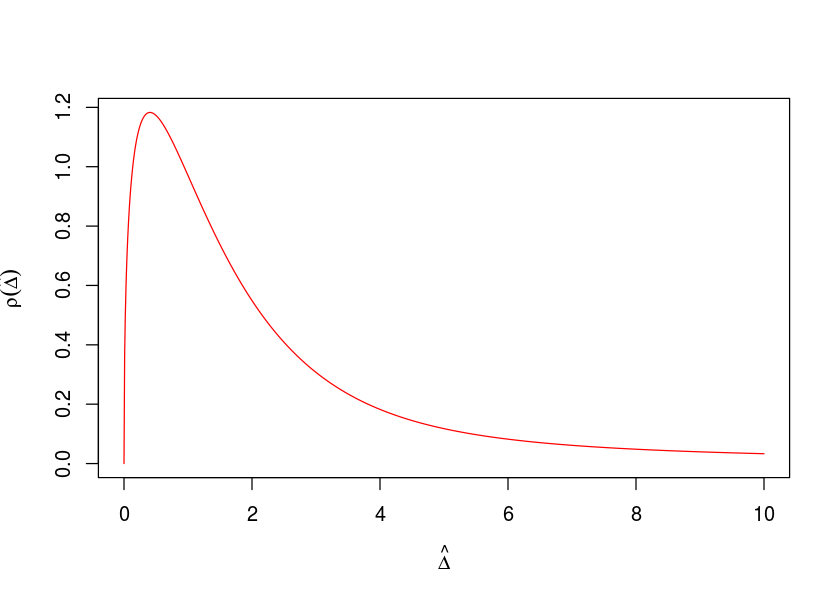

In [6]:
# Book shape plot
curve(rhov(x,.5),from=.0,to=10,col="red",xlab=expression(hat(Delta)),ylab=expression(rho(hat(Delta))),n=1000)

Figure 3: Approximate book density with $\mu = 1/2$

### Approximate density vs zero intelligence simulation

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BouchaudZIcomparison.png" align = "center" width=500></h2>

### Approximate density vs empirically observed order books

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/BouchaudEmpiricalOrderBook.png" align = "center" width=900></h2>


### Power-law arrival of orders

-   The Bouchaud et al. and Farmer et al. groups both published papers
    showing that the density of arrival of limit orders into the order
    book is a power-law function of distance $\Delta$ to the best quote.

-   [Mike and Farmer]<sup id="cite_ref-MikeFarmer" class="reference"><a href="#cite_note-MikeFarmer"><span>[</span>6<span>]</span></a></sup> found and described a further beautiful regularity:

    -   The distribution of distance $\Delta$ to the same-side best
        quote looks like Student-$t$.

    -   Recall the Student-t distribution:
        $$f(x)=\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\,\pi}\,\Gamma(\frac{\nu}{2})}\,\frac{1}{\left(1+\frac{x^2}{\nu}\right)^{\frac{\nu+1}{2}}}\sim \frac{1}{x^{\nu+1}}\text{ as }|x| \to \infty$$
        so Student-t with $\nu$ degrees of freedom has <span>*tail
        exponent*</span> $\nu$.

-   This means in particular that market orders are less likely when the
    spread is wide than when the spread is narrow.

### Power-law order placement

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/FarmerPlacement.png" align = "center" width=900></h2>


### Empirically observed tail exponents

-   Bouchaud, Mézard and Potters found $\mu \approx 0.6$ on the Paris
    Stock Exchange (data from Feb-2001).

-   Zovko and Farmer (2002) found $\mu \approx 1.5$ on the London Stock
    Exchange (data from Aug-1998 to Apr-2000).

-   Mike and Farmer found $\mu \approx 1.3$ on the London Stock Exchange
    (data from May-2000 to Dec-2002).

### Large tick and small tick stocks

If the minimum tick size (and so the minimum spread) is more than the
volatility per trade, we say that the stock is a <span>*large
tick*</span> stock. The spread for such stocks is typically one tick and
there is huge size at the best quote (C for example). When volatility
per trade is larger than the tick size, we say that the stock is a
<span>*small tick*</span> stock. The typical spread for such a stock is
more than one tick and there is only small size at the best quote.

-   We expect the Bouchaud Mézard and Potters results to hold for small
    tick stocks.

-   For large tick stocks, there should be an accumulation of volume at
    the best quote.

-   The minimum spread cannot be smaller than the minimum tick size!

### Summary

-   Parlour (1998) shows that a rational market order/ limit order
    decision should depend on the state of the order book

-   Foucault, Kadan and Kandel (2005) model the order book as a market
    for immediacy, relating the spread to the ratio between patient and
    impatient traders

-   Roşu (2009) removes many over-stylized features of FKK (2005) by
    allowing instantaneous cancelation of orders

-   Cont and Kukanov (2013) show how to incorporate the fee structures
    and current queue lengths in different venues to optimize the
    market/limit order mix.

-   Bouchaud, Mézard and Potters show that the average order book shape,
    consistent with ZI simulation and empirical observation, may be
    derived using a simple price diffusion approximation

-   Mike and Farmer find a simple empirical relationship between the
    arrival rates of limit and market orders

### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-BHS"><span class="mw-cite-backlink"><b><a href="#cite_ref-BHS">^</a></b></span> Bruno Biais, Pierre Hillion, and Chester Spatt, An Empirical Analysis of
the Limit Order Book and the Order Flow in the Paris Bourse, <span>*The
Journal of Finance*</span> <span>**50**</span>(5) 1655–1689, 1995.</li>


  <li id="cite_note-BouchaudFarmerLillo"><span class="mw-cite-backlink"><b><a href="#cite_ref-BouchaudFarmerLillo">^</a></b></span>   Jean-Philippe Bouchaud, J. Doyne Farmer, and Fabrizio Lillo, How Markets
Slowly Digest Changes in Supply and Demand, in <span>*Handbook of
Financial Markets: Dynamics and Evolution*</span> 57-156. (2009)
available at
http://tuvalu.santafe.edu/%7Ejdf/papers/MarketsSlowlyDigest.pdf:
Sections 2.2 and 2.9.3.</li>


  <li id="cite_note-BMP"><span class="mw-cite-backlink"><b><a href="#cite_ref-BMP">^</a></b></span>   Jean-Philippe Bouchaud, Marc Mézard and Marc Potters, Statistical
properties of stock order books: empirical results and models,
<span>*Quantitative Finance*</span> <span>**2**</span>(4) 251–256
(2002).</li>

  
  <li id="cite_note-ContKukanov"><span class="mw-cite-backlink"><b><a href="#cite_ref-ContKukanov">^</a></b></span>   Rama Cont and Arseniy Kukanov, Optimal order placement in limit order
markets, 
*Quantitative Finance* **17**(1) 21-39 (2017).</li>
  
  
    <li id="cite_note-Hasbrouck"><span class="mw-cite-backlink"><b><a href="#cite_ref-Hasbrouck">^</a></b></span>   Joel Hasbrouck, <span>*Empirical Market Microstructure*</span>, Oxford
University Press, Chapter 12 (2007).</li>


    <li id="cite_note-MikeFarmer"><span class="mw-cite-backlink"><b><a href="#cite_ref-MikeFarmer">^</a></b></span>   Szabolcs Mike and J. Doyne Farmer, An empirical behavioral model of
liquidity and volatility, <span>*Journal of Economic Dynamics &
Control*</span> <span>**32**</span> 200–234 (2008).</li>

    <li id="cite_note-Parlour"><span class="mw-cite-backlink"><b><a href="#cite_ref-Parlour">^</a></b></span>   Christine A Parlour, Price dynamics in limit order markets,<span>*The
Review of Financial Studies*</span> <span>**11**</span>(4) 789–816
(1998).</li>

    <li id="cite_note-Rosu"><span class="mw-cite-backlink"><b><a href="#cite_ref-Rosu">^</a></b></span>Ioanid Roşu, A dynamic model of the limit order book, <span>*Review of
Financial Studies*</span> <span>**22**</span>(11) 4601–4641 (2009).</li>
</ol>